In [1]:
import torch
import circuits as ckt
from circuits import Kinds
from models import Solver
from models import State
from data import Input,Process

In [2]:
# Get cpu or gpu device for training.
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
print(f"Using {device} device")

# torch.autograd.set_detect_anomaly(True)
torch.set_printoptions(precision=2, linewidth=200)

Using cpu device


# Generate Input Data for a Simple Circuit
Circuit is an independent voltage source and a resistor.

In [3]:
vr = ckt.ring(Kinds.IVS,Kinds.R,10)
vr.elements[0].attr = 100
vr.elements[-1].v = 4
vr

Circuit with 11 nodes and 11 elements

In [4]:
vr.elements

[(IVS, 10, 0),
 (R, 1, 0),
 (R, 2, 1),
 (R, 3, 2),
 (R, 4, 3),
 (R, 5, 4),
 (R, 6, 5),
 (R, 7, 6),
 (R, 8, 7),
 (R, 9, 8),
 (R, 10, 9)]

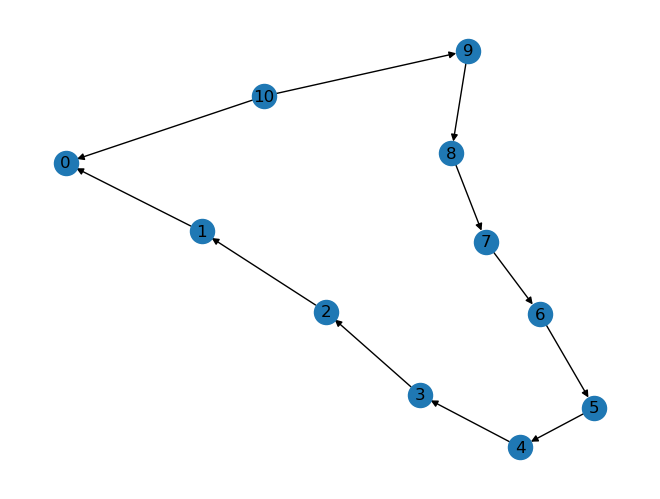

In [5]:
vr.draw()

In [6]:
input = Input(vr)

c:\Users\terry\OneDrive\Documents\GitHub\side_circuit\ml\circuits.py:74: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  M_scipy = nx.incidence_matrix(G=self.nx_graph(),oriented=True)


In [7]:
model = Solver(input=input,attr=input.attr_param, state=State.Solve)
model.attr

Parameter containing:
tensor([[100.00],
        [  0.90],
        [  0.98],
        [  0.63],
        [  0.82],
        [  0.82],
        [  0.20],
        [  0.78],
        [  0.97],
        [  0.70],
        [  0.35]], requires_grad=True)

In [8]:
X = model()
X

tensor([[-13.99],
        [ 13.99],
        [ 13.99],
        [ 13.99],
        [ 13.99],
        [ 13.99],
        [ 13.99],
        [ 13.99],
        [ 13.99],
        [ 13.99],
        [ 13.99],
        [100.00],
        [ 12.62],
        [ 13.68],
        [  8.80],
        [ 11.52],
        [ 11.46],
        [  2.82],
        [ 10.84],
        [ 13.51],
        [  9.86],
        [  4.89],
        [-12.62],
        [ 87.38],
        [ 73.71],
        [ 64.90],
        [ 53.38],
        [ 41.92],
        [ 39.10],
        [ 28.26],
        [ 14.75],
        [  4.89]], grad_fn=<LinalgSolveExBackward0>)

In [9]:
process = Process(input)

In [10]:
i_pred, v_pred, pot_pred = process.split(X)
i_pred, v_pred, pot_pred

(tensor([[-13.99],
         [ 13.99],
         [ 13.99],
         [ 13.99],
         [ 13.99],
         [ 13.99],
         [ 13.99],
         [ 13.99],
         [ 13.99],
         [ 13.99],
         [ 13.99]], grad_fn=<SliceBackward0>),
 tensor([[100.00],
         [ 12.62],
         [ 13.68],
         [  8.80],
         [ 11.52],
         [ 11.46],
         [  2.82],
         [ 10.84],
         [ 13.51],
         [  9.86],
         [  4.89]], grad_fn=<SliceBackward0>),
 tensor([[-12.62],
         [ 87.38],
         [ 73.71],
         [ 64.90],
         [ 53.38],
         [ 41.92],
         [ 39.10],
         [ 28.26],
         [ 14.75],
         [  4.89]], grad_fn=<SliceBackward0>))

In [11]:
ivp_in = input.ivp_inputs()
i_in, v_in, pot_in = process.split(ivp_in)
i_in, v_in, pot_in

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]),
 tensor([[100.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  4.]]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]))

In [12]:
mask = input.ivp_knowns_mask()
i_mask, v_mask, pot_mask = process.split(mask)
i_mask, v_mask, pot_mask

(tensor([[False],
         [False],
         [False],
         [False],
         [False],
         [False],
         [False],
         [False],
         [False],
         [False],
         [False]]),
 tensor([[ True],
         [False],
         [False],
         [False],
         [False],
         [False],
         [False],
         [False],
         [False],
         [False],
         [ True]]),
 tensor([[False],
         [False],
         [False],
         [False],
         [False],
         [False],
         [False],
         [False],
         [False],
         [False],
         [False]]))

In [13]:
input.circuit.A_edge(torch.float, False)

tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [14]:
input.circuit.A_edge_row_norm(torch.float, True)

tensor([[0.33, 0.33, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.33],
        [0.33, 0.33, 0.33, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.33, 0.33, 0.33, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.33, 0.33, 0.33, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.33, 0.33, 0.33, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.33, 0.33, 0.33, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.33, 0.33, 0.33, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.33, 0.33, 0.33, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.33, 0.33, 0.33, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.33, 0.33, 0.33],
        [0.33, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.33, 0.33]])

In [15]:
errors = process.errors(X, ivp_in, mask)
i_err_0, v_err_0, _ = process.split(errors)
i_err_0, v_err_0

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]], grad_fn=<SliceBackward0>),
 tensor([[ 0.00],
         [ 0.00],
         [ 0.00],
         [ 0.00],
         [ 0.00],
         [ 0.00],
         [ 0.00],
         [ 0.00],
         [ 0.00],
         [ 0.00],
         [-0.89]], grad_fn=<SliceBackward0>))

In [16]:
process.diffuse(v_err_0,True)

tensor([[-0.20],
        [-0.10],
        [ 0.00],
        [ 0.00],
        [ 0.00],
        [ 0.00],
        [ 0.00],
        [ 0.00],
        [-0.10],
        [-0.20],
        [-0.30]], grad_fn=<MmBackward0>)

In [17]:
process.diffuse(process.diffuse(v_err_0,True),True)

tensor([[-0.18],
        [-0.11],
        [-0.04],
        [-0.01],
        [ 0.00],
        [ 0.00],
        [-0.01],
        [-0.04],
        [-0.11],
        [-0.18],
        [-0.21]], grad_fn=<MmBackward0>)

In [18]:
num_diffs = 20
err = process.diffuse(v_err_0,True)
for n in range(num_diffs):
    err = process.diffuse(err,True)
err

tensor([[-0.08],
        [-0.08],
        [-0.08],
        [-0.08],
        [-0.08],
        [-0.08],
        [-0.08],
        [-0.08],
        [-0.08],
        [-0.08],
        [-0.08]], grad_fn=<MmBackward0>)